In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn scipy

In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


In [5]:
data = pd.read_csv('/home/sargam/things/college/daa/lp3/ml/kmeans/sales_data_sample.csv', encoding='unicode_escape')

In [6]:
print("Dataset shape:", data.shape)
print(data.head())
print(data.info())

Dataset shape: (2823, 25)
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue

In [7]:
# Step 3: Data Cleaning & Preprocessing
# Check for missing values
print(data.isnull().sum())

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [8]:
# If missing values present, handle them (e.g., drop or impute)
data = data.dropna()

In [9]:
# Select numeric columns only for clustering
numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
data_numeric = data[numeric_cols]

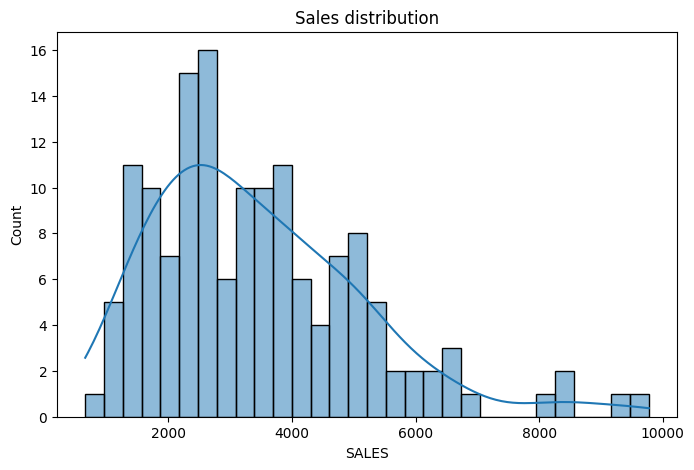

In [20]:
# Step 4: Exploratory Data Analysis (EDA)
plt.figure(figsize=(8, 5))
sns.histplot(data['SALES'], bins=30, kde=True)
plt.title('Sales distribution')
plt.show()


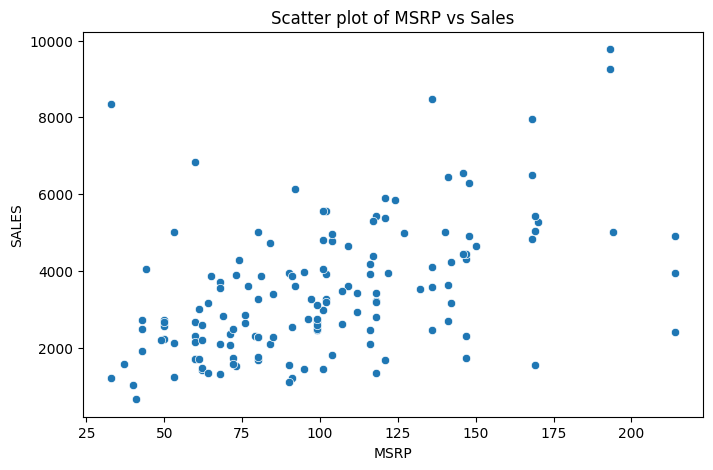

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='MSRP', y='SALES', data=data)
plt.title('Scatter plot of MSRP vs Sales')
plt.xlabel('MSRP')
plt.ylabel('SALES')
plt.show()

In [10]:
# Step 4: Feature Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

In [11]:
# Step 5: Determine optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

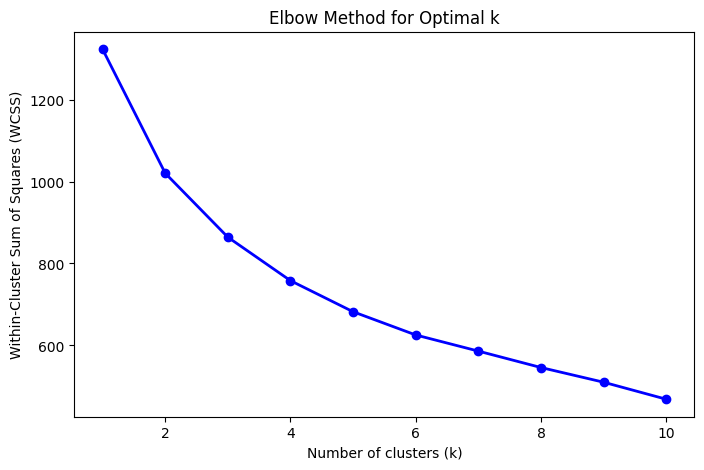

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, 'bo-', linewidth=2)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [13]:
# Step 6: Fit K-Means model with chosen number of clusters, e.g., k=3 based on elbow plot
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
kmeans.fit(data_scaled)
labels = kmeans.labels_


In [14]:
# Add cluster labels to original dataframe for visualization
data['Cluster'] = labels

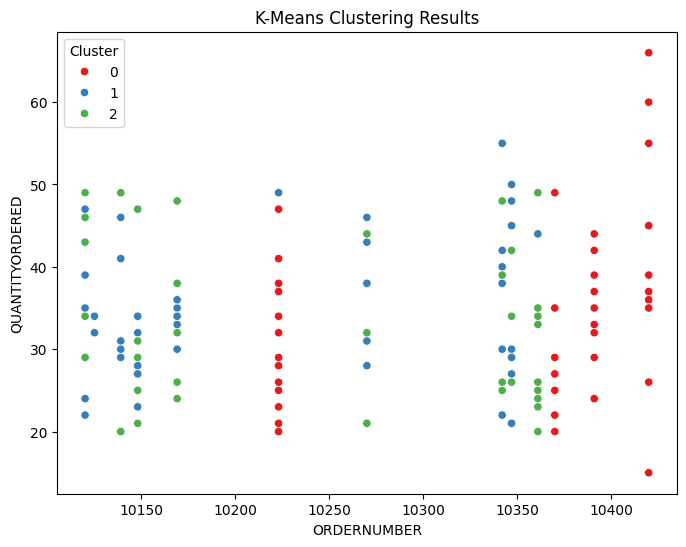

In [15]:
# Step 7: Visualize the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=data_numeric.iloc[:, 0], y=data_numeric.iloc[:, 1],
                hue=data['Cluster'], palette='Set1')
plt.title('K-Means Clustering Results')
plt.xlabel(data_numeric.columns[0])
plt.ylabel(data_numeric.columns[1])
plt.legend(title='Cluster')
plt.show()

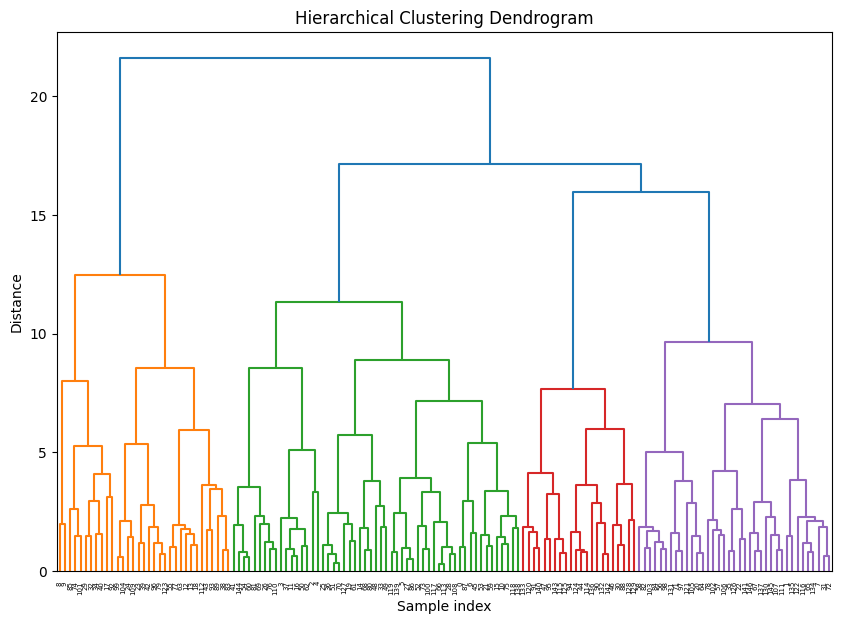

In [16]:
# Step 8: Hierarchical Clustering - Agglomerative
linkage_matrix = linkage(data_scaled, method='ward')

# Dendrogram plot
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [17]:
# Step 9: Create clusters by cutting dendrogram at a threshold, e.g., 3 clusters
clusters_hierarchical = fcluster(linkage_matrix, t=3, criterion='maxclust')
data['Hierarchical_Cluster'] = clusters_hierarchical

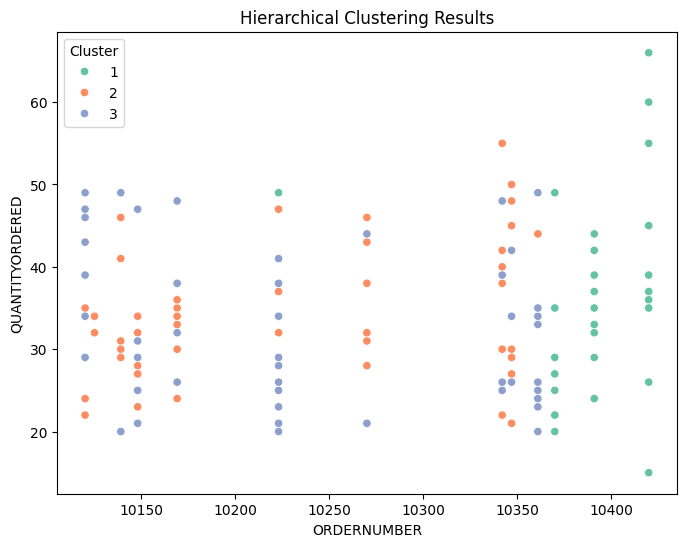

In [18]:
# Step 10: Optional - Visualize hierarchical clusters similarly
plt.figure(figsize=(8,6))
sns.scatterplot(x=data_numeric.iloc[:, 0], y=data_numeric.iloc[:, 1],
                hue=data['Hierarchical_Cluster'], palette='Set2')
plt.title('Hierarchical Clustering Results')
plt.xlabel(data_numeric.columns[0])
plt.ylabel(data_numeric.columns[1])
plt.legend(title='Cluster')
plt.show()

In [32]:
idx_sales = data_numeric.columns.get_loc('SALES')
idx_msrp = data_numeric.columns.get_loc('MSRP')


In [34]:
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_scaled)  # This fits the model and returns cluster labels


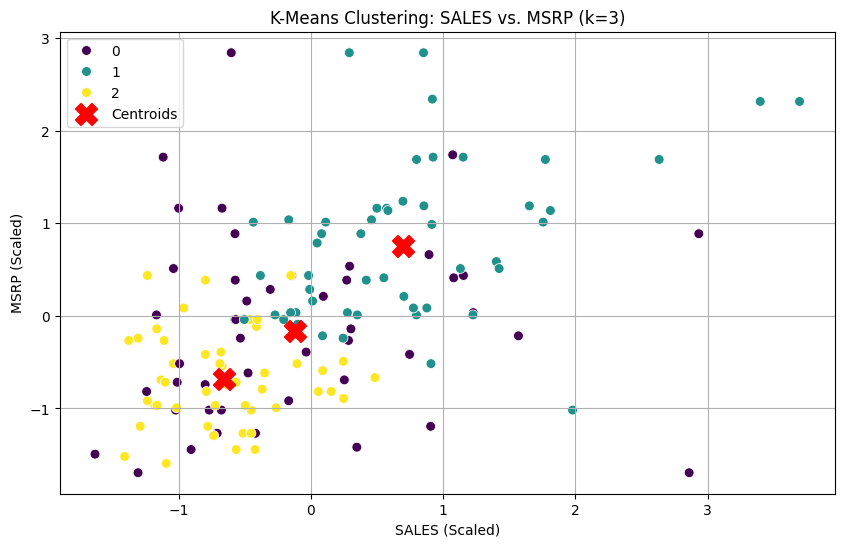

In [36]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=data_scaled[:, idx_sales], 
                y=data_scaled[:, idx_msrp],
                hue=data['Cluster'], palette='viridis', s=50)

plt.scatter(kmeans.cluster_centers_[:, idx_sales], 
            kmeans.cluster_centers_[:, idx_msrp],
            marker='X', s=250, color='red', label='Centroids')

plt.title(f'K-Means Clustering: SALES vs. MSRP (k={k_optimal})')
plt.xlabel('SALES (Scaled)')
plt.ylabel('MSRP (Scaled)')
plt.legend()
plt.grid(True)
plt.show()
